In [ ]:
##  Data preprosessing

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
def load_and_preprocess_data():
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split the data into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, iris.target_names

X_train, X_test, y_train, y_test, target_names = load_and_preprocess_data()


In [ ]:
##  Model Training

In [8]:
from sklearn.svm import SVC

# Train the SVM model
def train_svm_model(X_train, y_train):
    svm_model = SVC(kernel='linear', C=1.0, random_state=42)
    svm_model.fit(X_train, y_train)
    return svm_model

# Train the model
model = train_svm_model(X_train, y_train)


In [ ]:
## Model Evaluation

Accuracy: 96.67%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



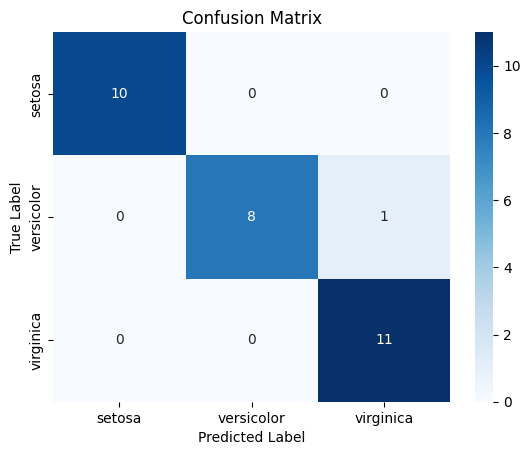

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
def evaluate_model(model, X_test, y_test, target_names):
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Classification Report
    print('Classification Report:')
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the model
evaluate_model(model, X_test, y_test, target_names)
